# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [2]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [3]:
pokemon = pd.DataFrame(raw_data)
pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [4]:
pokemon = pokemon [['name', 'type', 'hp', 'evolution', 'pokedex']]

### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [5]:
import random

place_list = ['lakes','parks','hills','forest']
places=[]
for i in range(pokemon.shape[0]):
    places.append(random.choice(place_list))

pokemon.insert((pokemon.shape[1]),"place",places)

### 6. Display the data type of each column

In [6]:
for i in range(pokemon.shape[1]):
    print(pokemon.columns[i]," : ",pokemon.dtypes[i])

name  :  object
type  :  object
hp  :  int64
evolution  :  object
pokedex  :  object
place  :  object


### 7. Display the info of dataframe

In [7]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   place      4 non-null      object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [8]:
wine = pd.read_csv("wine.txt")

### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [9]:
wine.drop(columns=wine.columns[[0,3,6,8,10,12,13]], inplace = True)

### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [10]:
wine.columns = ['alcohol','malic_acid','alcalinity_of_ash','magnesium','flavanoid','proanthocyanins','hue']



### 11. Set the values of the first 3 values from alcohol column as NaN

In [11]:
wine.loc[0:2,'alcohol']=np.nan

### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [12]:
wine.loc[[2,3],'magnesium']=np.nan

### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [13]:
wine['alcohol'].fillna(value=10,inplace=True)
wine['magnesium'].fillna(value=100,inplace=True)

### 14. Count the number of missing values in all columns.

In [14]:
wine.isnull().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoid            0
proanthocyanins      0
hue                  0
dtype: int64

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [15]:
import random
random_list = []

for i in range(11):
    random_list.append(random.randint(0,10))

print(random_list)

[3, 8, 4, 3, 9, 6, 5, 10, 7, 0, 10]


### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [16]:
for i in range(len(wine['alcohol'])):
    if int(wine['alcohol'][i]) in random_list:
        wine['alcohol'][i] = np.nan

### 17.  How many missing values do we have now?

In [17]:
wine.isnull().sum()

alcohol              3
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoid            0
proanthocyanins      0
hue                  0
dtype: int64

### 18. Print only the non-null values in alcohol

In [18]:
print(wine['alcohol'][wine['alcohol'].notnull()])

3      13.24
4      14.20
5      14.39
6      14.06
7      14.83
       ...  
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, Length: 174, dtype: float64


### 19. Delete the rows that contain missing values

In [19]:
wine.dropna(inplace=True)

### 20.  Reset the index, so it starts with 0 again

In [20]:
wine['index'] = np.arange(0,len(wine))
wine.set_index(['index'])

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoid,proanthocyanins,hue
index,,,,,,,
0,13.24,2.59,21.0,100.0,2.69,1.82,1.04
1,14.20,1.76,15.2,112.0,3.39,1.97,1.05
2,14.39,1.87,14.6,96.0,2.52,1.98,1.02
3,14.06,2.15,17.6,121.0,2.51,1.25,1.06
4,14.83,1.64,14.0,97.0,2.98,1.98,1.08
...,...,...,...,...,...,...,...
169,13.71,5.65,20.5,95.0,0.61,1.06,0.64
170,13.40,3.91,23.0,102.0,0.75,1.41,0.70
171,13.27,4.28,20.0,120.0,0.69,1.35,0.59


## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [21]:
chipo= pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')

### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [22]:
chipo['item_price']=chipo['item_price'].str.replace("$","",regex=True).astype(float)
chipo[chipo['item_price']>10].count()

order_id              1130
quantity              1130
item_name             1130
choice_description    1123
item_price            1130
dtype: int64

### 22. Print the Chipo Dataframe & info about data frame

In [23]:
chipo
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [24]:
chip_sort = chipo[['item_name','item_price']].drop_duplicates().sort_values('item_price',ascending= False,ignore_index=True)
chip_sort

,item_name,item_price
0,Chips and Fresh Tomato Salsa,44.25
1,Carnitas Bowl,35.25
2,Chicken Burrito,35.00
3,Veggie Burrito,33.75
4,Chicken Bowl,32.94
...,...,...
204,Side of Chips,1.69
205,Bottled Water,1.50
206,Canned Soft Drink,1.25
207,Canned Soda,1.09


### 24. Sort by the name of the item

In [25]:
chip_sort.sort_values('item_name')

,item_name,item_price
46,6 Pack Soft Drink,12.98
166,6 Pack Soft Drink,6.49
116,Barbacoa Bowl,8.99
142,Barbacoa Bowl,8.69
68,Barbacoa Bowl,11.48
...,...,...
133,Veggie Salad Bowl,8.75
134,Veggie Soft Tacos,8.75
74,Veggie Soft Tacos,11.25
37,Veggie Soft Tacos,16.98


### 25. What was the quantity of the most expensive item ordered?

In [26]:
chipo['item_price'][chipo['item_price']==chipo['item_price'].max()].value_counts()

44.25    1
Name: item_price, dtype: int64

### 26. How many times were a Veggie Salad Bowl ordered?

In [27]:
chipo['item_name'][chipo['item_name']=='Veggie Salad Bowl'].value_counts()

Veggie Salad Bowl    18
Name: item_name, dtype: int64

### 27. How many times people orderd more than one Canned Soda?

In [28]:
chipo[(chipo['item_name']=='Canned Soda') & (chipo['quantity']>1)].value_counts().sum()

20

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [29]:
users = pd.read_csv("occupation.csv",sep='|')

### 29. Discover what is the mean age per occupation

In [30]:
users.groupby('occupation')[['age']].mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [31]:
gender_counts = users.groupby(['occupation', 'gender'])['gender'].count()
total_counts = users.groupby(['occupation'])['gender'].count()
male_ratio = gender_counts.loc[:, 'M'] / total_counts
male_ratio = male_ratio.sort_values(ascending=False)

print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


OR

In [32]:
male_ratio = (users[users['gender']=='M'].groupby(['occupation','gender'])['gender'].count())/total_counts

### 31. For each occupation, calculate the minimum and maximum ages

In [33]:
users.groupby('occupation').agg({'age':['min','max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

### 32. For each combination of occupation and gender, calculate the mean age

In [34]:
users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### 33.  For each occupation present the percentage of women and men

In [35]:
users.groupby(['occupation'])['gender'].value_counts(normalize=True)*100

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.714286
               F          34.285714
progra

## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [36]:
df1= pd.read_csv('student-mat.csv')
df2= pd.read_csv('student-por.csv')
df=pd.concat([df1,df2], ignore_index=True)

### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [37]:
df.loc[:,'school':'guardian']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother


### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [38]:
x = lambda a: a.capitalize()
print(x("at home"))

At home


### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [39]:
df[['Fjob', 'Mjob']].apply(lambda x: x.str.capitalize())


,Fjob,Mjob
0,Teacher,At_home
1,Other,At_home
2,Other,At_home
3,Services,Health
4,Other,Other
...,...,...
1039,Other,Services
1040,Services,Teacher
1041,Other,Other
1042,Services,Services


### 38. Print the last elements of the data set. (Last few records)

In [40]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [41]:
df[['Fjob', 'Mjob']] = df[['Fjob', 'Mjob']].apply(lambda x: x.str.capitalize())

### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [42]:
def majority(age):
    if age>=18:
        return True
    else:
        return False
    

In [43]:
df['legal_drinker']=df['age'].apply(majority)

### 41. Multiply every number of the dataset by 10. 

In [44]:
df.select_dtypes('number')*10

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,180,40,40,20,20,0,40,30,40,10,10,30,60,50,60,60
1,170,10,10,10,20,0,50,30,30,10,10,30,40,50,50,60
2,150,10,10,10,20,30,40,30,20,20,30,30,100,70,80,100
3,150,40,20,10,30,0,30,20,20,10,10,50,20,150,140,150
4,160,30,30,10,20,0,40,30,20,10,20,50,40,60,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,190,20,30,10,30,10,50,40,20,10,20,50,40,100,110,100
1040,180,30,10,10,20,0,40,30,40,10,10,10,40,150,150,160
1041,180,10,10,20,20,0,10,10,10,10,10,50,60,110,120,90
1042,170,30,10,20,10,0,20,40,50,30,40,20,60,100,100,100


## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [45]:
cars1=pd.read_csv('cars1.csv')
cars2=pd.read_csv('cars2.csv')

   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [46]:
type(cars1)

pandas.core.frame.DataFrame

In [47]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [48]:
cars1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN


In [49]:
cars1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [50]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [51]:
cars1.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
car              object
Unnamed: 9      float64
Unnamed: 10     float64
Unnamed: 11     float64
Unnamed: 12     float64
Unnamed: 13     float64
dtype: object

In [52]:
cars1.index

RangeIndex(start=0, stop=198, step=1)

In [53]:
cars1.shape

(198, 14)

In [54]:
cars1.count()

mpg             198
cylinders       198
displacement    198
horsepower      198
weight          198
acceleration    198
model           198
origin          198
car             198
Unnamed: 9        0
Unnamed: 10       0
Unnamed: 11       0
Unnamed: 12       0
Unnamed: 13       0
dtype: int64

In [55]:
cars1.size

2772

In [56]:
cars1.ndim

2

In [57]:
cars1.axes

[RangeIndex(start=0, stop=198, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
        'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
       dtype='object')]

In [58]:
cars1.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,0.0,0.0,0.0,0.0,0.0
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,NaN,NaN,NaN,NaN,NaN
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,NaN,NaN,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [59]:
cars1.memory_usage()

Index            128
mpg             1584
cylinders       1584
displacement    1584
horsepower      1584
weight          1584
acceleration    1584
model           1584
origin          1584
car             1584
Unnamed: 9      1584
Unnamed: 10     1584
Unnamed: 11     1584
Unnamed: 12     1584
Unnamed: 13     1584
dtype: int64

In [60]:
cars1.sort_values(by='cylinders')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
111,18.0,3,70,90,2124,13.5,73,3,maxda rx3,NaN,NaN,NaN,NaN,NaN
71,19.0,3,70,97,2330,13.5,72,3,mazda rx2 coupe,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN
141,29.0,4,98,83,2219,16.5,74,2,audi fox,NaN,NaN,NaN,NaN,NaN
142,26.0,4,79,67,1963,15.5,74,2,volkswagen dasher,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,16.0,8,302,140,4141,14.0,74,1,ford gran torino,NaN,NaN,NaN,NaN,NaN
72,15.0,8,304,150,3892,12.5,72,1,amc matador (sw),NaN,NaN,NaN,NaN,NaN
73,13.0,8,307,130,4098,14.0,72,1,chevrolet chevelle concours (sw),NaN,NaN,NaN,NaN,NaN
75,14.0,8,318,150,4077,14.0,72,1,plymouth satellite custom (sw),NaN,NaN,NaN,NaN,NaN


In [61]:
#pip install ydata-profiling
#pip install ipywidgets

In [62]:
from ydata_profiling import ProfileReport

In [63]:
ProfileReport(cars1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [64]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [65]:
cars1.dropna(axis=1,inplace=True)

### 45. What is the number of observations in each dataset?

In [66]:
cars1.shape[0], cars2.shape[0]

(198, 200)

### 46. Join cars1 and cars2 into a single DataFrame called cars

In [67]:
cars=pd.concat([cars1,cars2],ignore_index=True)

### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [68]:
owner_list=np.random.randint(15000,73000,size=len(cars))

### 48. Add the column owners to cars

In [69]:
cars['owners']=owner_list

## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [70]:
import pandas as pd
import numpy as np

In [71]:
import datetime
tday=datetime.datetime.now()
print('Current date and time - ',tday)
print('Current year - ',tday.year)
print('Month of year - ',tday.strftime("%B"))
print('Week number of the year - ',tday.isocalendar()[1])
print('Weekday of the week - ',tday.strftime('%A'))
print('Day of year - ',tday.timetuple().tm_yday)
print('Day of month - ',tday.day)
print('Day of week - ',tday.weekday())
    

Current date and time -  2023-04-02 08:57:47.926570
Current year -  2023
Month of year -  April
Week number of the year -  13
Weekday of the week -  Sunday
Day of year -  92
Day of month -  2
Day of week -  6


### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [72]:
my_str = "Jul 1 2014 2:43PM"
my_date = datetime.datetime.strptime(my_str,'%b %d %Y %I:%M%p')
print(my_date)

2014-07-01 14:43:00


### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [73]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

In [74]:
current_date = "2015/06/22"

print((datetime.strptime(current_date,'%Y/%m/%d').date())-(dt.timedelta(days=5)))

2015-06-17


### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [75]:
unix_time = 1284105682

print(datetime.utcfromtimestamp(unix_time).strftime('%Y-%m-%d %H:%M:%S'))

2010-09-10 08:01:22


### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [76]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])
pd.to_datetime(DoB)-pd.DateOffset(years=100)

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

### 54. Write a Python program to get days between two dates. 

In [77]:
def date_diff(a,b):
    y=pd.to_datetime(a)
    x=pd.to_datetime(b)
    return abs(y-x)

print(date_diff('2022-3-29','2022-3-20'))

9 days 00:00:00


### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 89"

In [78]:
Date = "15Dec1989"
a=dt.datetime.strptime(Date,"%d%b%Y")
c=dt.datetime.strftime(a,"%A, %d %b %y")
print(f'Result : "{c}"')

Result : "Friday, 15 Dec 89"


## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [79]:
data=pd.read_csv("wind.data",parse_dates=[['Yr','Mo','Dy']])

### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [80]:
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(lambda x: x-pd.DateOffset(years=100) if x.year>2000 else x)

### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [81]:
data=data.set_index('Yr_Mo_Dy')
print(data.index.dtype)

datetime64[ns]


### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [82]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### 60. Compute how many non-missing values there are in total.

In [83]:
data.size-data.isna().sum().sum()

78857

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [84]:
data.mean().mean()

10.227982360836938

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [85]:
loc_stats = data.describe().loc[['min','max','mean','std'],:]

### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [86]:
day_stats = data.T.describe().loc[['min','max','mean','std'],:]

### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [87]:
data[data.index.month==1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [88]:
data.groupby([data.index.year,data.index.month]).mean()

RPT        VAL        ROS       KIL        SHA  \
Yr_Mo_Dy Yr_Mo_Dy                                                         
1961     1         14.841333  11.988333  13.431613  7.736774  11.072759   
         2         16.269286  14.975357  14.441481  9.230741  13.852143   
         3         10.890000  11.296452  10.752903  7.284000  10.509355   
         4         10.722667   9.427667   9.998000  5.830667   8.435000   
         5          9.860968   8.850000  10.818065  5.905333   9.490323   
...                      ...        ...        ...       ...        ...   
1978     8          9.645161   8.259355   9.032258  4.502903   7.368065   
         9         10.913667  10.895000  10.635000  5.725000  10.372000   
         10         9.897742   8.670968   9.295806  4.721290   8.525161   
         11        16.151667  14.802667  13.508000  7.317333  11.475000   
         12        16.175484  13.748065  15.635161  7.094839  11.398710   

                         BIR        DUB        CLA        MUL        CLO  \
Yr_Mo_Dy Yr_Mo_Dy                                                          
1961     1          8.588065  11.184839   9.245333   9.085806  10.107419   
         2         10.937500  11.890714  11.846071  11.821429  12.714286   
         3          8.866774   9.644194   9.829677  10.294138  11.251935   
         4          6.495000   6.925333   7.094667   7.342333   7.237000   
         5          6.574839   7.604000   8.177097   8.039355   8.499355   
...                      ...        ...        ...        ...        ...   
1978     8          5.935161   5.650323   5.417742   7.241290   5.536774   
         9          9.278333  10.790333   9.583000  10.069333   8.939000   
         10         6.774194   8.115484   7.337742   8.297742   8.243871   
         11         8.743000  11.492333   9.657333  10.701333  10.676000   
         12         9.241613  12.077419  10.194839  10.616774  11.028710   

                         BEL        MAL  
Yr_Mo_Dy Yr_Mo_Dy                        
1961     1         13.880968  14.703226  
         2         18.583214  15.411786  
         3         16.410968  15.720000  
         4         11.147333  10.278333  
         5         11.900323  12.011613  
...                      ...        ...  
1978     8         10.466774  12.054194  
         9         15.680333  19.391333  
         10        13.776774  17.150000  
         11        17.404667  20.723000  
         12        13.859677  21.371613  

[216 rows x 12 columns]

### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [89]:
ndata=data.resample('W',loffset=pd.DateOffset(days=1)).mean()
ndata.T.describe().loc[['min','max','mean','std'],:].head(52)

C:\Users\karpi\AppData\Local\Temp\ipykernel_13844\3725950840.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ndata=data.resample('W',loffset=pd.DateOffset(days=1)).mean()


Yr_Mo_Dy,1961-01-02,1961-01-09,1961-01-16,1961-01-23,1961-01-30,1961-02-06,1961-02-13,1961-02-20,1961-02-27,1961-03-06,...,1978-10-30,1978-11-06,1978-11-13,1978-11-20,1978-11-27,1978-12-04,1978-12-11,1978-12-18,1978-12-25,1979-01-01
min,9.290000,6.417143,4.630000,6.328571,12.720000,8.247143,10.774286,9.542857,8.524286,7.834286,...,3.204286,6.682857,7.684286,10.417143,6.361429,5.565714,9.777143,6.917143,4.004286,6.507143
max,18.500000,13.541429,12.468571,13.204286,22.530000,16.827143,21.832857,21.167143,16.304286,17.842857,...,16.915714,18.721429,22.522857,23.905714,19.491429,18.728571,23.061429,16.758571,18.977143,26.844286
mean,13.018182,9.847659,8.353214,9.368413,16.958095,11.800357,15.891548,13.726825,12.604286,11.766766,...,8.532738,11.728929,13.134048,16.042262,11.850000,10.913333,15.938333,11.216786,9.414167,12.824405
std,2.808875,2.601705,2.719649,2.224531,2.915635,2.807310,3.147412,3.105819,2.364323,2.535336,...,3.676673,3.714993,4.255132,4.208913,4.064974,3.557747,3.843412,3.474393,3.909628,5.152236


## The below exercises (67-70) required to use appl_1980_2014.csv  file

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [90]:
apple = pd.read_csv("appl_1980_2014.csv")

### 68.  Check out the type of the columns

In [91]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 69. Transform the Date column as a datetime type

In [92]:
apple.Date=pd.to_datetime(apple.Date)
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### 70.  Set the date as the index

In [93]:
apple.set_index('Date',inplace=True)

### 71.  Is there any duplicate dates?

In [94]:
apple.index.duplicated().sum()

0

### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [95]:
apple=apple.sort_values(by='Date',ascending=True)

### 73. Get the last business day of each month

In [96]:
apple['day']=apple.index.day
apple.groupby([apple.index.year,apple.index.month_name()])['day'].last()

Date  Date    
1980  December    31
1981  April       30
      August      31
      December    31
      February    27
                  ..
2014  January     31
      July         8
      June        30
      March       31
      May         30
Name: day, Length: 404, dtype: int64

### 74.  What is the difference in days between the first day and the oldest

In [97]:
apple.index.max()-apple.index.min()

Timedelta('12261 days 00:00:00')

### 75.  How many months in the data we have?

In [98]:
len(apple.groupby([apple.index.year,apple.index.month]).count())

404

## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

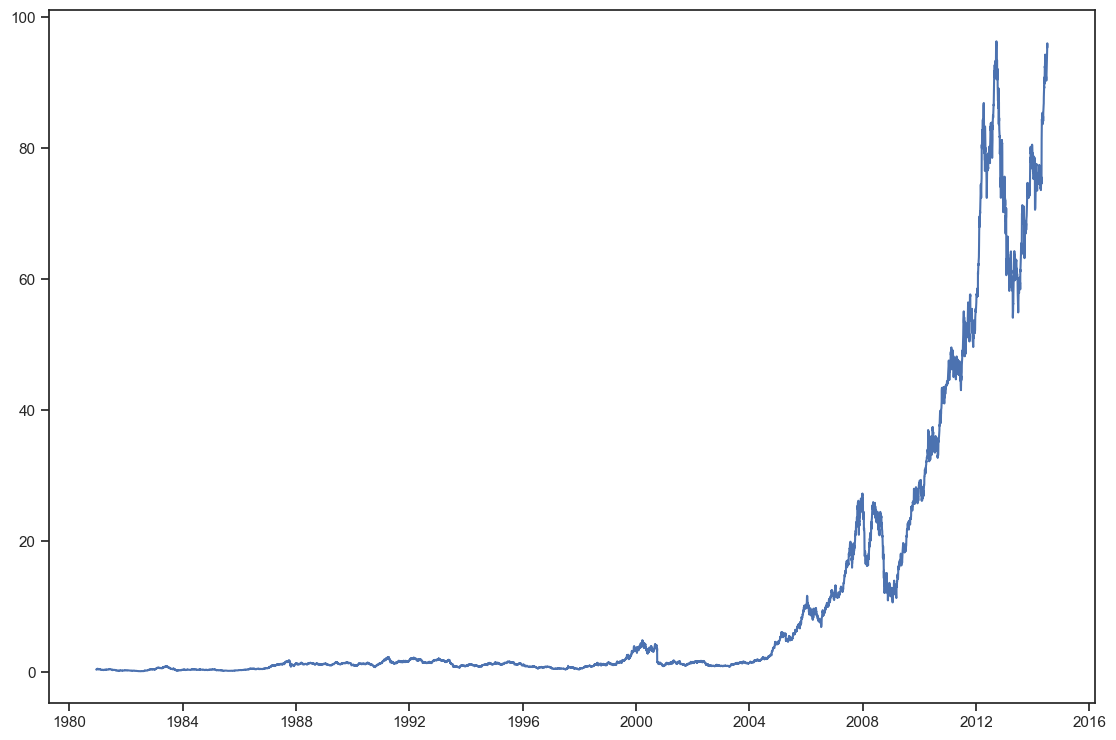

In [99]:
plt.figure(figsize=(13.5,9))
plt.plot(apple['Adj Close'])
plt.show()

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [100]:
online_rt = pd.read_csv("Online_Retail.csv",encoding='windows-1252')

### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

<AxesSubplot: xlabel='Country', ylabel='Quantity'>

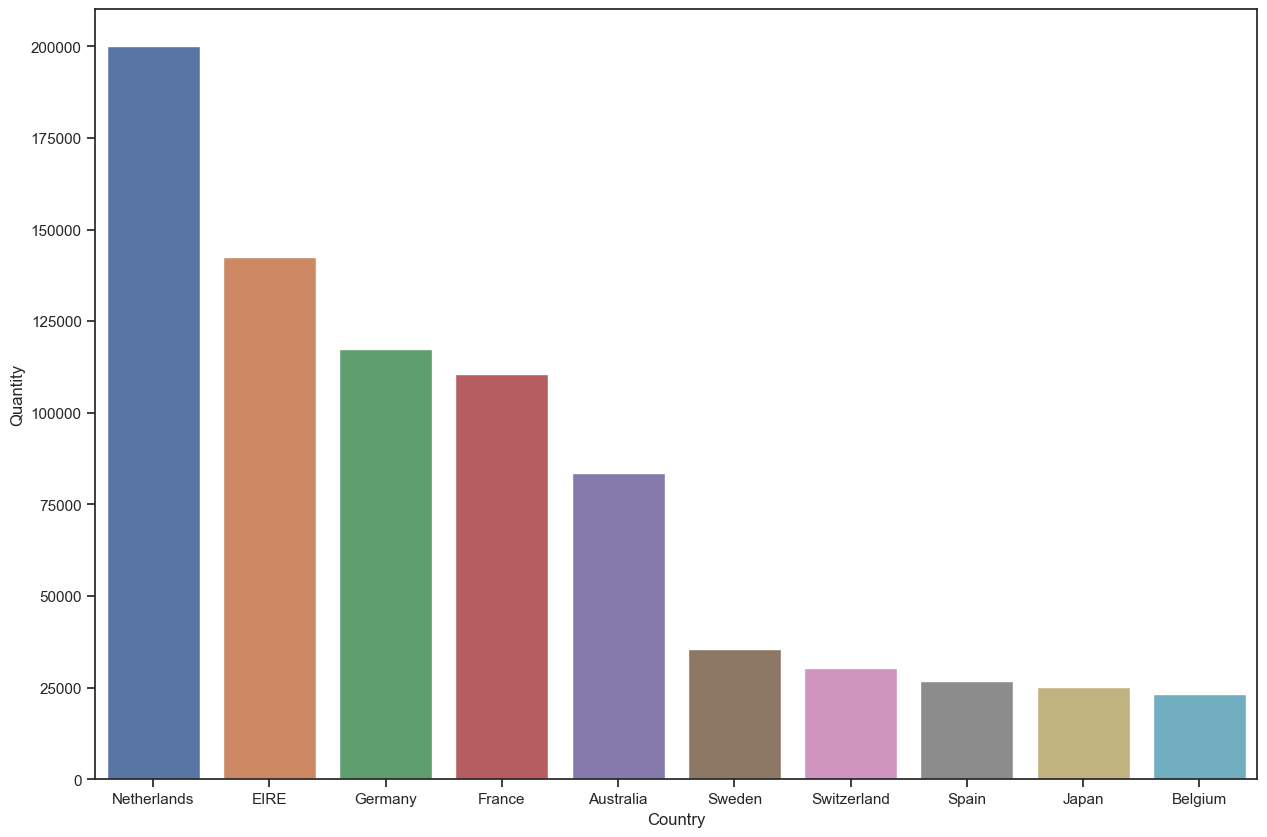

In [101]:
bar_chart = online_rt[online_rt.Country != "United Kingdom"].groupby("Country")[['Quantity']].sum().sort_values(by='Quantity',ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=bar_chart,x=bar_chart.index,y='Quantity')

### 79.  Exclude negative Quatity entries

In [102]:
online_rt=online_rt[online_rt['Quantity']>0]

### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


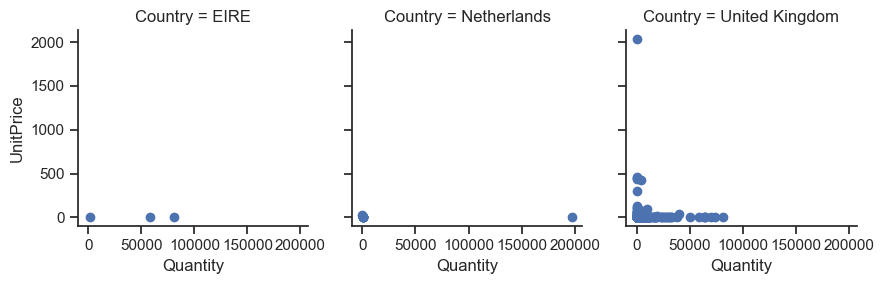

In [103]:
online_rt['Revenue']=online_rt['Quantity']*online_rt['UnitPrice']
Top3=online_rt.groupby('Country')[['Revenue']].sum().sort_values(by='Revenue',ascending=False).head(3).index.to_list()
scatter_data=online_rt.query(f'Country== {Top3} ').groupby(['Country','CustomerID']).agg({'Quantity':'sum','UnitPrice':'mean'}).reset_index()
splot=sns.FacetGrid(scatter_data,col='Country')
splot.map(plt.scatter,"Quantity","UnitPrice")

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [104]:
company_data=pd.read_csv('FMCG_Company_Data_2019.csv')

### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

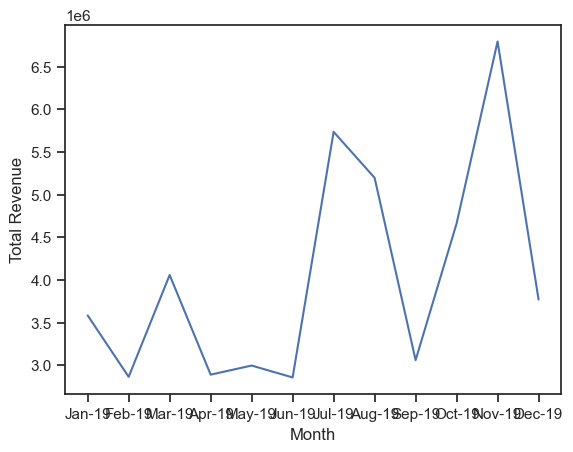

In [105]:
plt.plot(company_data.Month,company_data.Total_Revenue)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

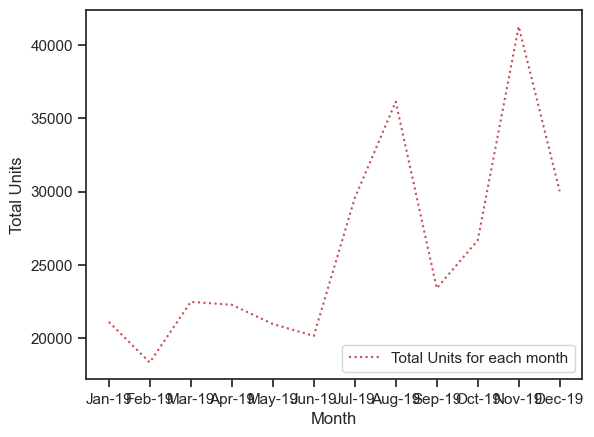

In [106]:
plt.plot(company_data.Month,company_data.Total_Units,linestyle='dotted',color='r',label='Total Units for each month')
plt.xlabel('Month')
plt.ylabel('Total Units')
plt.legend(loc='lower right')
plt.show()

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

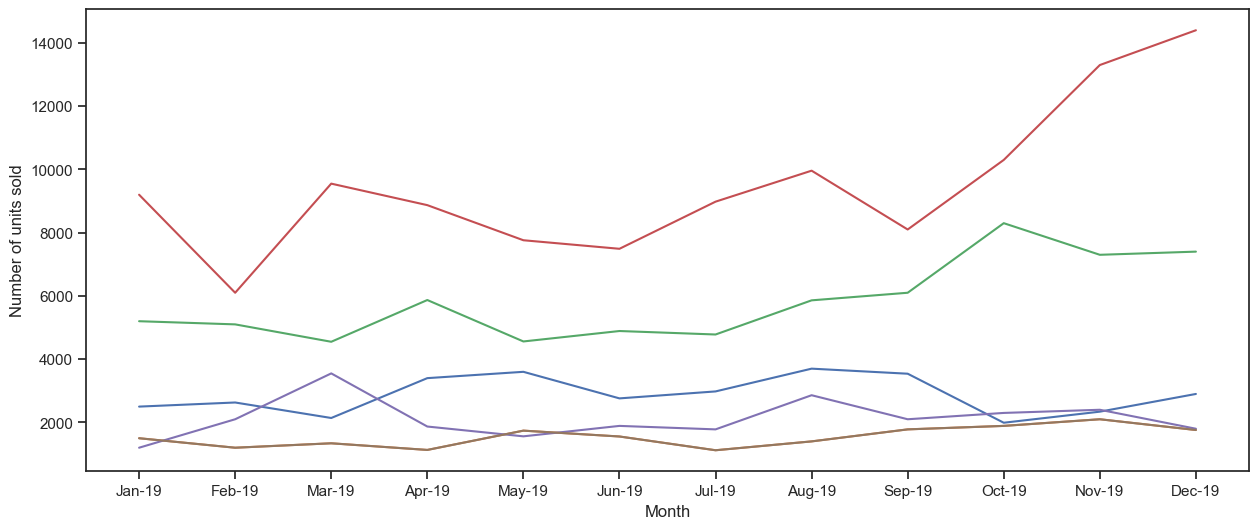

In [107]:
plt.figure(figsize=(15,6))
plt.plot(company_data.Month,company_data.FaceCream,label='FaceCream')
plt.plot(company_data.Month,company_data.FaceWash,label='FaceWash')
plt.plot(company_data.Month,company_data.ToothPaste,label='Toothpaste')
plt.plot(company_data.Month,company_data.Soap,label='Soap')
plt.plot(company_data.Month,company_data.Shampo,label='Shampo')
plt.plot(company_data.Month,company_data.Moisturizer,label='Moisturizer')
plt.xlabel('Month')
plt.ylabel('Number of units sold')
plt.show()

### 85. Create Bar Chart for soap of all months and Save the chart in folder

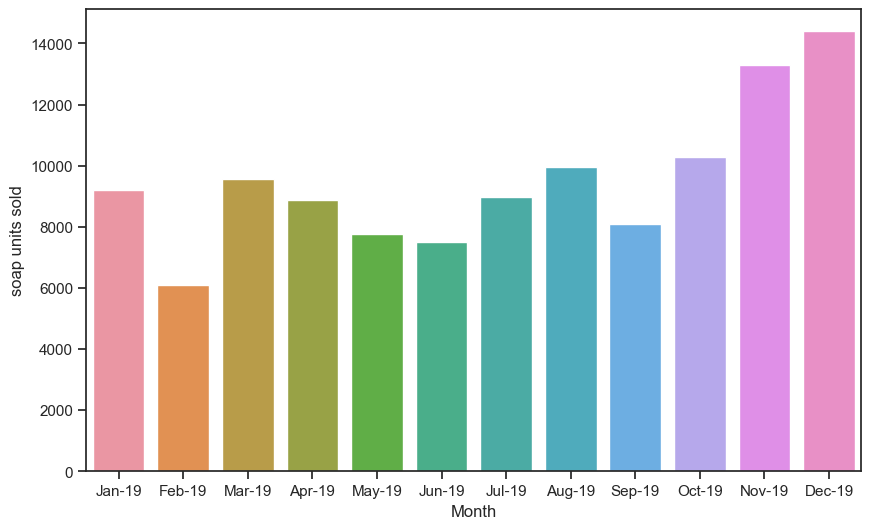

In [108]:
plt.figure(figsize=(10,6))
sns.barplot(data=company_data,x='Month',y='Soap')
plt.ylabel('soap units sold')
plt.savefig('Bar Chart')
plt.show()

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

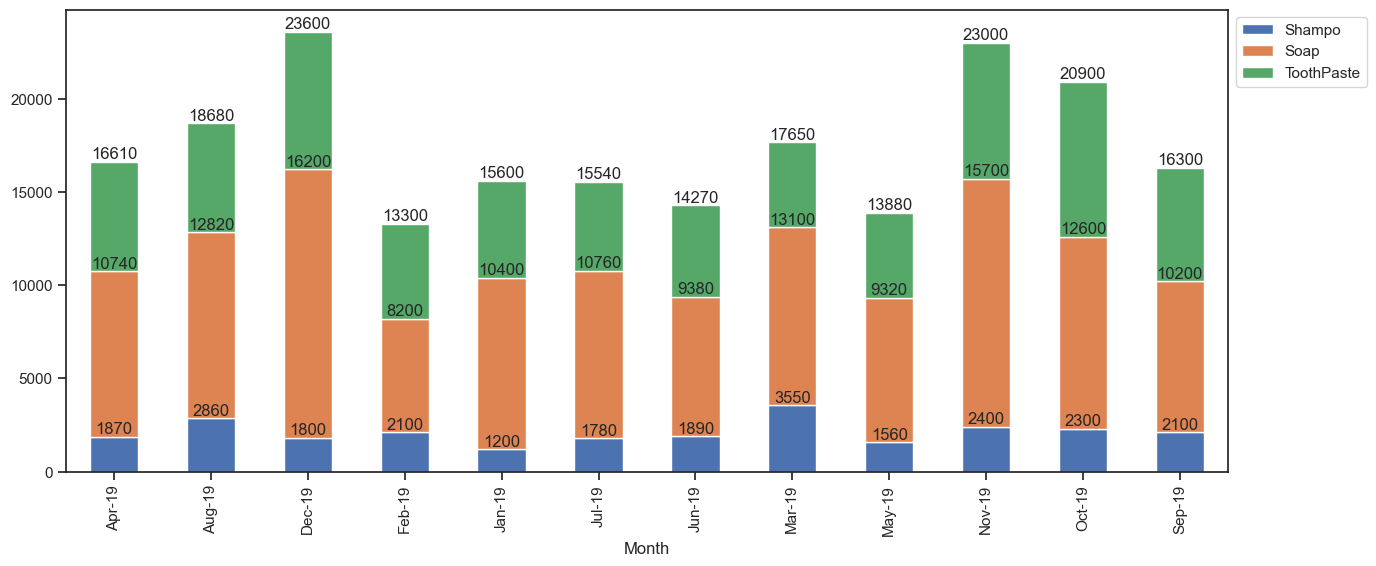

In [109]:
stacked_data=pd.pivot_table(data=company_data,index='Month',values=['Soap','Shampo','ToothPaste']).plot(kind='bar',stacked=True,figsize=(15,6))
for i in stacked_data.containers:
    stacked_data.bar_label(i)
plt.legend(bbox_to_anchor=(1,1))

### 87. Create Histogram for Total Revenue

<function matplotlib.pyplot.show(close=None, block=None)>

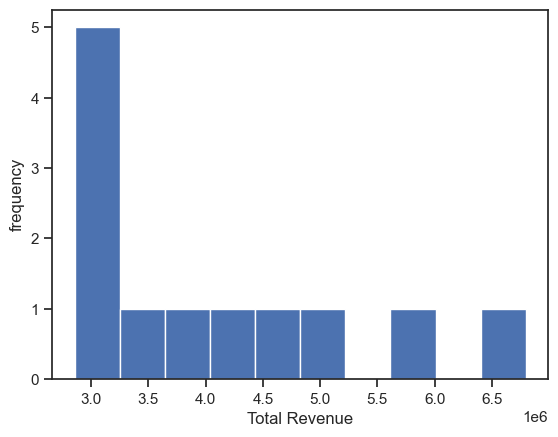

In [110]:
plt.hist(company_data.Total_Revenue)
plt.xlabel('Total Revenue')
plt.ylabel('frequency')
plt.show

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

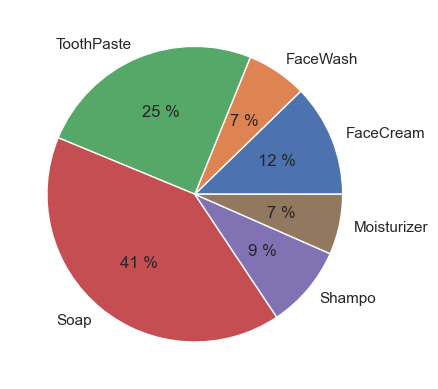

In [111]:
sale_data=company_data.loc[:,'FaceCream':'Moisturizer'].sum()
plt.pie(sale_data,labels=sale_data.index,autopct='%.0f %%')
plt.show()

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

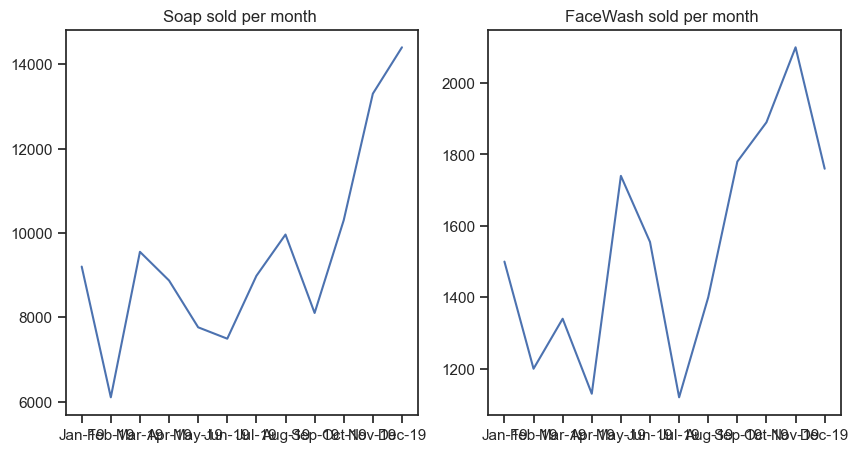

In [112]:
f, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(company_data.Month,company_data.Soap)
axes[0].set_title('Soap sold per month ')
axes[1].plot(company_data.Month,company_data.FaceWash)
axes[1].set_title('FaceWash sold per month ')
plt.show()

### 90. Create Box Plot for Total Profit variable

<AxesSubplot: >

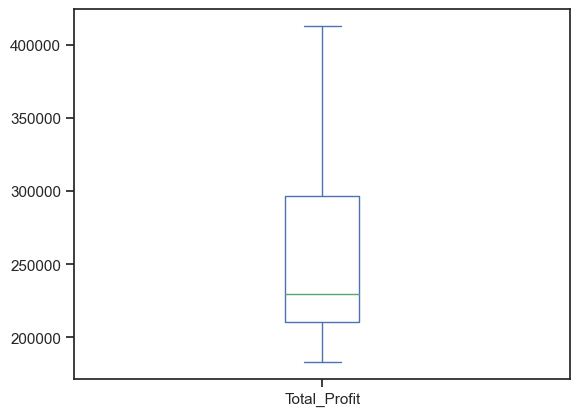

In [113]:
company_data.Total_Profit.plot(kind='box')